In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
dirs = [
    'serial',
    'parallel/para2',
    'parallel/para4',
    'parallel/para8',
    'parallel/para12'
]
ncores = np.array([1,2,4,8,12])

In [4]:
times = []
for dirr in dirs:
    with open(dirr+'/time_to_run.out','r') as f:
        line = f.readline()
        times.append(float(line.split()[-2]))
times = np.array(times)

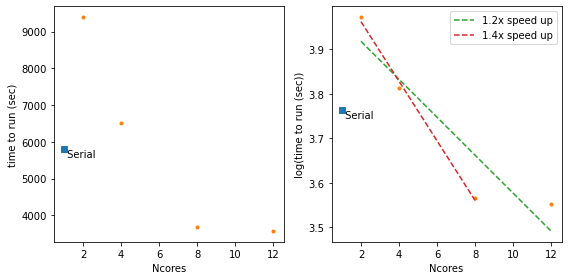

In [5]:
fig,axs = plt.subplots(1,2,figsize=(8,4),tight_layout=True)
ax = axs[0]
ax.plot(ncores[0],times[0],'s',ls='')
ax.text(ncores[0],times[0],' Serial',ha='left',va='top')
ax.plot(ncores[1:],times[1:],'.',ls='')
ax.set(xlabel='Ncores')
ax.set(ylabel='time to run (sec)')

from scipy.optimize import curve_fit
def f(x,m,b):
    return m*x+b

lts = np.log10(times)
popt,pcov = curve_fit(f,ncores[1:],lts[1:])
popt2,pcov2 = curve_fit(f,ncores[1:-1],lts[1:-1])

ax = axs[1]
ax.plot(ncores[0],lts[0],'s',ls='')
ax.text(ncores[0],lts[0],' Serial',ha='left',va='top')
ax.plot(ncores[1:],lts[1:],'.',ls='')
ax.plot(ncores[1:],f(ncores[1:],*popt),ls='--',label=f'{1/(10**(2*popt[0])):.1f}x speed up')
ax.plot(ncores[1:-1],f(ncores[1:-1],*popt2),ls='--',label=f'{1/(10**(2*popt2[0])):.1f}x speed up')
ax.set(xlabel='Ncores')
ax.set(ylabel='log(time to run (sec))')
ax.legend(loc='upper right')

plt.savefig('time_results.png',bbox_inches='tight')

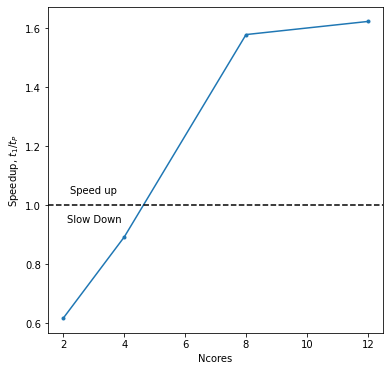

In [16]:
fig,ax = plt.subplots(1,figsize=(6,6))
# ax = axs[0]
# ax.plot(ncores[0],times[0],'s',ls='')
# ax.text(ncores[0],times[0],' Serial',ha='left',va='top')
ax.plot(ncores[1:],times[0]/times[1:],'.',ls='-')
ax.set(xlabel='Ncores')
ax.set(ylabel='Speedup, $t_1/t_P$')

tc = 'k'
ax.axhline(1.0,c='k',ls='--')
tx = 3
ty=0.05
ax.text(tx,1+ty,'Speed up',color=tc,va='center',ha='center')
ax.text(tx,1-ty,'Slow Down',color=tc,va='center',ha='center')

plt.savefig('parallel_speedup.png')